In [72]:
import pandas as pd
df = pd.read_csv('/Users/phuong/Documents/AAAI_Project/All_Articles.csv',encoding ='latin1')
df.head()

,PMID,Article Title,Abstract,Publication Type,Methods Section,First Label,Second Label,Third Label,hydroxymethylglutaryl,acetaminophen,...,tramadol,trazodone,triazolam,valproate,venlafaxine,verapamil,voriconazole,warfarin,ziprasidone,zolpidem
0,8646822,A kinetic and dynamic study of oral alprazolam...,To assess the possible involvement of CYP3A4 i...,Clinical Trial ;Journal Article ;Randomized Co...,methods subjects twelve unrelated healthy male...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8453848,A potentially hazardous interaction between er...,Interaction between erythromycin and midazolam...,Clinical Trial ;Journal Article ;Randomized Co...,material and methods study design orally admin...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23210726,A semi-mechanistic absorption model to evaluat...,The aim of this study was to develop a PK/PD m...,Journal Article ;Randomized Controlled Trial ;...,methods ten healthy male volunteers randomized...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11936570,A study of the interaction potential of azithr...,Atorvastatin is a common option among the HMG-...,"Clinical Trial ;Clinical Trial, Phase I ;Compa...",materials and methods this randomized open lab...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1387301,Absolute bioavailability of clarithromycin aft...,The absolute bioavailability of clarithromycin...,Clinical Trial ;Comparative Study ;Journal Art...,clarithromycin new 14 membered macrolide antim...,PK Trial,PK Trial,PK Trial,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from io import StringIO

col = ['Article Title','Abstract','Methods Section','First Label','Second Label',"Third Label"]
df = df[col]

#generate categorize_id level 1 based on First Label
df.columns = ['Article Title','Abstract','Methods Section','First Label','Second Label',"Third Label"]
df['category_id_1'] = df['First Label'].factorize()[0]
category_id_df = df[['First Label', 'category_id_1']].drop_duplicates().sort_values('category_id_1')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id_1', 'First Label']].values)

#generate categorize_id level 2 based on Second Label
df['category_id_2'] = df['Second Label'].factorize()[0]
category_id_df_2 = df[['Second Label', 'category_id_2']].drop_duplicates().sort_values('category_id_2')
category_to_id_2 = dict(category_id_df_2.values)
id_to_category_2 = dict(category_id_df_2[['category_id_2', 'Second Label']].values)

#generate categorize_id level 3 based on Second Label
df['category_id_3'] = df['Third Label'].factorize()[0]
category_id_df_3 = df[['Third Label', 'category_id_3']].drop_duplicates().sort_values('category_id_3')
category_to_id_3 = dict(category_id_df_3.values)
id_to_category_3 = dict(category_id_df_3[['category_id_3', 'Third Label']].values)

df.head(20)

# df.to_excel('/Users/phuong/Documents/AAAI_Project/All_Articles_Processed.xls', encoding='utf-8')

,Article Title,Abstract,Methods Section,First Label,Second Label,Third Label,category_id_1,category_id_2,category_id_3
0,A kinetic and dynamic study of oral alprazolam...,To assess the possible involvement of CYP3A4 i...,methods subjects twelve unrelated healthy male...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
1,A potentially hazardous interaction between er...,Interaction between erythromycin and midazolam...,material and methods study design orally admin...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
2,A semi-mechanistic absorption model to evaluat...,The aim of this study was to develop a PK/PD m...,methods ten healthy male volunteers randomized...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
3,A study of the interaction potential of azithr...,Atorvastatin is a common option among the HMG-...,materials and methods this randomized open lab...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
4,Absolute bioavailability of clarithromycin aft...,The absolute bioavailability of clarithromycin...,clarithromycin new 14 membered macrolide antim...,PK Trial,PK Trial,PK Trial,1,1,1
5,Absolute bioavailability of oral immediate and...,The present study was conducted with the aim o...,materials methods the study performed accordan...,PK Trial,PK Trial,PK Trial,1,1,1
6,Absolute oral bioavailability of rosuvastatin ...,Rosuvastatin is a 3-hydroxy-3-methylglutaryl c...,subjects and methods inclusion exclusion crite...,PK Trial,PK Trial,PK Trial,1,1,1
7,Amiodarone interacts with simvastatin but not ...,The aim of this study was to determine the inf...,methods subjects twelve white occidental healt...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
8,An assessment of drug-drug interactions: the e...,A number of antidepressants inhibit the activi...,materials methods this single center randomize...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
9,Assessing the clinical significance of botanic...,Phytochemical-mediated modulation of cytochrom...,methods study subjects the university of arkan...,DDI Clinical Trial,Non RCT Clinical Trial,Non RCT Clinical Trial,0,2,2


In [74]:
#Read the drug entities features
df1 = pd.read_csv('/Users/phuong/Documents/AAAI_Project/All_Drug_Entities_Features.csv',encoding ='latin1')

(185, 113858)
# 'Genotyped PK Trial':
  . Most correlated bigrams:
. cyp2d6 10
. pm hmem
. group 1a
. nmol per
. demethyldesacetyl diltiazem
. venlafaxine desvenlafaxine
. venlafaxine er
. demethyl diltiazem
. cyp3a5 cyp3a5
. 1b group
. tt tt
. 1a slco1b1
. 1b 15
. 1a 1b
. slco1b1 1a
. 1b 1b
. gg gg
. cyp2c19 cyp2c19
. 1a 1a
. aa aa
# 'Non RCT Clinical Trial':
  . Most correlated bigrams:
. to the
. at the
. as the
. ml of
. during the
. calculated as
. used to
. on days
. by the
. determined by
. prior to
. was used
. the study
. was calculated
. for the
. of venlafaxine
. samples were
. of the
. subjects were
. of quetiapine
# 'Non RCT Parallel Clinical Trial':
  . Most correlated bigrams:
. dmi nfz
. outreach team
. anaesthesia pages
. blackwell publishing
. publishing ltd
. pages forum
. ltd anaesthesia
. dmr values
. inhibition half
. days uoxetine
. days sertraline
. baseline dmr
. 1ohmid 4ohmid
. second session
. mid 1ohmid
. mg mid
. drug discontinuation
. dmi 75mg
. time cours

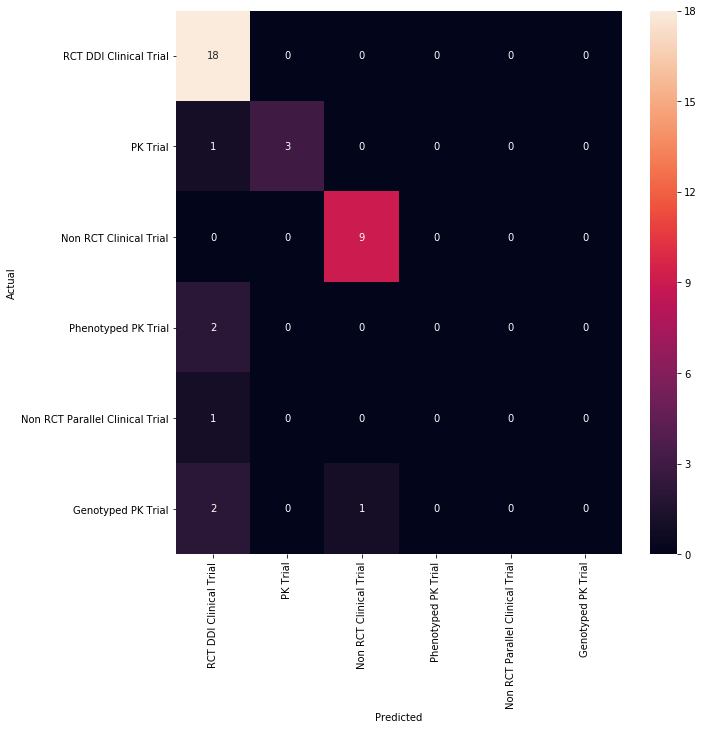

In [75]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

# SVM Model with bigrams taken from Abstract, Article Title, & Methods Section text
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import class_weight
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import defaultdict

###MAIN PROGRAM###
#put labels
labels_level_1 = df.category_id_1
labels_level_2 = df.category_id_2
labels_level_3 = df.category_id_3

#Get tfidf from Title. Abstract, Methods Section
# vectorizer = CountVectorizer(ngram_range=(2,2))
# vectorizer = TfidfVectorizer()
text = df['Abstract'] + df['Article Title'] + df['Methods Section']
tfidf = TfidfVectorizer(ngram_range=(1, 2))
features = tfidf.fit_transform(text).toarray()
labels = df.category_id_3
print (features.shape)

N= 20
for categorize_name, category_id in sorted(category_to_id_3.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print ("# '{}':".format(categorize_name))
    print ("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# # X_train_dtm = bigram_features
# # for column in df1.columns[1:]:
# #     X_train_dtm = hstack((X_train_dtm,np.array(df1[column])[:,None])).tocsr()

X_new = SelectKBest(chi2, k=5000).fit_transform(features, labels_level_3)    
    
#Train multi-class SVM model 
X_train, X_test, y_train, y_test,  = train_test_split(X_new, labels_level_3, stratify = labels_level_3, test_size=0.2, random_state = 0)
model = SVC(kernel='linear', class_weight='balanced')
clf = model.fit(X_train, y_train)
predictions = clf.predict(X_test)

#Print Accurancy, ROC AUC, F1 Scores, Recall, Precision)
print ('Accuracy:', accuracy_score(y_test, predictions))
print ('Precision:', precision_score(y_test, predictions,average='weighted'))
print ('Recall:', recall_score(y_test, predictions,average='weighted'))
print ('F1 score:', f1_score(y_test, predictions,average='weighted'))
print (classification_report(y_test,predictions))

conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df_3['Third Label'].values, yticklabels=category_id_df_3['Third Label'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
        

In [99]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import class_weight
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import defaultdict
from nltk.stem.snowball import SnowballStemmer
from nltk import WordNetLemmatizer, pos_tag, word_tokenize
from nltk.corpus import wordnet
import pickle
from sklearn.pipeline import Pipeline
    
#get most informative features
def most_informative_feature_for_binary_classification(vectorizer, classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]  
    
    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)
       
############MAIN PROGRAM#############
stemmer = SnowballStemmer('english', ignore_stopwords=False)

class StemmedTfidfVectorizer(TfidfVectorizer):    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))


#Get unigram from Title. Abstract, Methods Section
text = df['Abstract'] + df['Article Title'] + df['Methods Section']
vectorizer = StemmedTfidfVectorizer(stemmer=stemmer, sublinear_tf=True, ngram_range=(1, 1))
X_train_dtm = vectorizer.fit_transform(text)

features = vectorizer.fit_transform(text).toarray()
N= 20
for categorize_name, category_id in sorted(category_to_id_3.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(vectorizer.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    print ("# '{}':".format(categorize_name))
    print (". Top unigrams:\n . {}".format('\n . '.join(unigrams)))
    
# # print (vectorizer.get_feature_names())
# for column in df1.columns[1:]:
#     X_train_dtm = hstack((X_train_dtm,np.array(df1[column])[:,None])).tocsr()
   
labels_level_1 = df.category_id_1
labels_level_2 = df.category_id_2
labels_level_3 = df.category_id_3

skf = StratifiedKFold(n_splits=5)
n_folds = skf.get_n_splits(X_train_dtm,labels_level_1)

level_1_accuracies = 0
level_1_roc_auc_scores =0
level_1_precisions =0
level_1_recalls =0
level_1_f1s =0

level2_DDI_accuracies = 0
level2_DDI_roc_auc_scores = 0
level2_DDI_precisions = 0
level2_DDI_recalls = 0
level2_DDI_f1s = 0

level2_PK_accuracies = 0
level2_PK_roc_auc_scores = 0
level2_PK_precisions = 0
level2_PK_recalls = 0
level2_PK_f1s = 0

level3_PK_accuracies = 0
level3_PK_roc_auc_scores = 0
level3_PK_precisions = 0
level3_PK_recalls = 0
level3_PK_f1s = 0

level3_DDI_accuracies = 0
level3_DDI_roc_auc_scores = 0
level3_DDI_precisions = 0
level3_DDI_recalls = 0
level3_DDI_f1s = 0

for train_index, test_index in skf.split(X_train_dtm,labels_level_1):
    chi_squarer = SelectKBest(chi2, k=5000)
    
    #get the train/test sets for layer 1 classifier
    X_train, X_test =  X_train_dtm[train_index], X_train_dtm[test_index]     
    y_train, y_test = labels_level_1[train_index], labels_level_1[test_index]
    
    #fit and predict layer 1 classifier
    model = SVC(kernel='linear',class_weight="balanced")        
    clf_pipe = Pipeline([('chi_sq', chi_squarer), ('model', model)])
    clf = clf_pipe.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    #get result of layer 1 classifier
    level_1_accuracies += accuracy_score(y_test, predictions)
    level_1_roc_auc_scores += roc_auc_score(y_test,predictions)
    level_1_precisions += precision_score(y_test, predictions,average='weighted')
    level_1_recalls += recall_score(y_test, predictions,average='weighted')
    level_1_f1s += f1_score(y_test, predictions,average='weighted')
    
    ###------ LAYER 2 CLASSIFIERS------####

    #get index of data from layer 1 classifier for layer 2 classifiers (called DDI classifier & PK classifier)
    train__index_level2_DDI = (list(y_train[y_train==0].index))
    train__index_level2_PK = (list(y_train[y_train==1].index))
    test_index_level2_DDI = (list(y_test[y_test==0].index))
    test_index_level2_PK = (list(y_test[y_test==1].index))
    
    #get the train/test sets for layer 2 DDI classifier    
    X_train_level2_DDI, X_test_level2_DDI =  X_train_dtm[train__index_level2_DDI], X_train_dtm[test_index_level2_DDI]     
    y_train_level2_DDI, y_test_level2_DDI = labels_level_2[train__index_level2_DDI], labels_level_2[test_index_level2_DDI]
    
    #fit layer 2 DDI classifier model 
    model_level2_DDI = SVC(kernel='linear',class_weight="balanced")
    clf_level2_DDI = model_level2_DDI.fit(X_train_level2_DDI, y_train_level2_DDI)
    predictions_level2_DDI = clf_level2_DDI.predict(X_test_level2_DDI)
    
    #get results layer 2 DDI classifier
    level2_DDI_accuracies += accuracy_score(y_test_level2_DDI, predictions_level2_DDI)
    level2_DDI_roc_auc_scores += roc_auc_score(y_test_level2_DDI,predictions_level2_DDI)
    level2_DDI_precisions += precision_score(y_test_level2_DDI, predictions_level2_DDI,average='weighted')
    level2_DDI_recalls += recall_score(y_test_level2_DDI, predictions_level2_DDI,average='weighted')
    level2_DDI_f1s += f1_score(y_test_level2_DDI, predictions_level2_DDI,average='weighted')

    #get the train/test sets for layer 2 PK classifier
    X_train_level2_PK, X_test_level2_PK =  X_train_dtm[train__index_level2_PK], X_train_dtm[test_index_level2_PK]     
    y_train_level2_PK, y_test_level2_PK = labels_level_2[train__index_level2_PK], labels_level_2[test_index_level2_PK]    
    
    #fit layer 2 PK classifier model 
    model_level2_PK = SVC(kernel='linear',class_weight="balanced")
    clf_level2_PK = model_level2_PK.fit(X_train_level2_PK, y_train_level2_PK)
    predictions_level2_PK = clf_level2_PK.predict(X_test_level2_PK)
    
    #get results layer 2 PK classifier
    level2_PK_accuracies += accuracy_score(y_test_level2_PK, predictions_level2_PK)
    level2_PK_precisions += precision_score(y_test_level2_PK, predictions_level2_PK,average='weighted')
    level2_PK_roc_auc_scores += roc_auc_score(y_test_level2_PK,predictions_level2_PK)
    level2_PK_recalls += recall_score(y_test_level2_PK, predictions_level2_PK,average='weighted')
    level2_PK_f1s += f1_score(y_test_level2_PK, predictions_level2_PK,average='weighted')
    
    
    ###------ LAYER 3 CLASSIFIERS------####
    
    #get index of data from layer 2 classifier for layer 3 classifiers (called NonRCT classifier & PK classifier)
    train__index_level3_PK = (list(y_train_level2_PK[y_train_level2_PK==3].index))
    test_index_level3_PK = (list(y_test_level2_PK[y_test_level2_PK==3].index))
    train__index_level3_NonRCT = (list(y_train_level2_DDI[y_train_level2_DDI==2].index))
    test_index_level3_NonRCT = (list(y_train_level2_DDI[y_train_level2_DDI==2].index))
    
    #get the train/test sets for layer 3 PK Classifier (Phenotyped vs. Genotyped Trials)
    X_train_level3_PK, X_test_level3_PK =  X_train_dtm[train__index_level3_PK], X_train_dtm[test_index_level3_PK]     
    y_train_level3_PK, y_test_level3_PK = labels_level_3[train__index_level3_PK], labels_level_3[test_index_level3_PK]
    
    #fit model 
    model_level3_PK = SVC(kernel='linear',class_weight="balanced")
    clf_level3_PK = model_level3_PK.fit(X_train_level3_PK, y_train_level3_PK)
    predictions_level3_PK = clf_level3_PK.predict(X_test_level3_PK)
    
    #get results model level 3 Phenotyped vs. Genotyped Trials
    level3_PK_accuracies += accuracy_score(y_test_level3_PK, predictions_level3_PK)
    level3_PK_precisions += precision_score(y_test_level3_PK, predictions_level3_PK,average='weighted')
    level3_PK_recalls += recall_score(y_test_level3_PK, predictions_level3_PK,average='weighted')
    level3_PK_f1s += f1_score(y_test_level3_PK, predictions_level3_PK,average='weighted')
    
#     #Print out the row that are misclassified
#     for row_index, (X_test_item, prediction, label) in enumerate(zip (X_test_level3_PK, predictions_level3_PK, y_test_level3_PK)):
#         if prediction != label:
#             print ('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

    ##get the train/test sets for layer 3 DDI Classifier (NonRCT vs. Non RCT Parallel Trial)
    X_train_level3_DDI, X_test_level3_DDI = X_train_dtm[train__index_level3_NonRCT], X_train_dtm[test_index_level3_NonRCT]     
    y_train_level3_DDI, y_test_level3_DDI = labels_level_3[train__index_level3_NonRCT], labels_level_3[test_index_level3_NonRCT]
        
    #calculate class weight for the NonRCT vs. NonRCT Parallel Trial (dataset is too small)
    from sklearn.utils.class_weight import compute_class_weight
    class_weight_list = compute_class_weight('balanced', np.unique(y_train_level3_DDI), y_train_level3_DDI)
    class_weight_customized = dict(zip(np.unique(y_train_level3_DDI), class_weight_list))
#     print (class_weight_customized)
    
    #fit model 
    model_level3_DDI = SVC(kernel='linear',class_weight=class_weight_customized)
    clf_level3_DDI = model_level3_DDI.fit(X_train_level3_DDI, y_train_level3_DDI)
    predictions_level3_DDI = clf_level3_DDI.predict(X_test_level3_DDI)
    
    #get results model level 3 NonRCT vs. Non RCT Parallel Trial
    level3_DDI_accuracies += accuracy_score(y_test_level3_DDI, predictions_level3_DDI)
    level3_DDI_precisions += precision_score(y_test_level3_DDI, predictions_level3_DDI,average='weighted')
    level3_DDI_recalls += recall_score(y_test_level3_DDI, predictions_level3_DDI,average='weighted')
    level3_DDI_f1s += f1_score(y_test_level3_DDI, predictions_level3_DDI,average='weighted')
    
    print (predictions_level3_DDI)
    
    #Print out the row that are misclassified
#     for row_index, (X_test_item, prediction, label) in enumerate(zip (X_test_level3_DDI, predictions_level3_DDI, y_test_level3_DDI)):
#         if prediction != label:
#             print ('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

#     #Print out confusion matrix, True Positive, True Negative, False Positive, False Negative
#     cm = confusion_matrix(y_test_level3_DDI, predictions_level3_DDI)
#     print(cm)
#     tn, fp, fn, tp = cm.ravel()
#     print (tn, fp, fn, tp)

# save the models to disk
filename_classifier1_1 = '/Users/phuong/Documents/AAAI_Project/Models/model_1_1.sav'
pickle.dump(clf, open(filename_classifier1_1, 'wb'))

filename_classifier2_1 = '/Users/phuong/Documents/AAAI_Project/Models/model_2_1.sav'
pickle.dump(clf_level2_DDI, open(filename_classifier2_1, 'wb'))
    
filename_classifier2_2 = '/Users/phuong/Documents/AAAI_Project/Models/model_2_2.sav'
pickle.dump(clf_level2_PK, open(filename_classifier2_2, 'wb'))
    
filename_classifier3_1 = '/Users/phuong/Documents/AAAI_Project/Models/model_3_1.sav'
pickle.dump(clf_level3_DDI, open(filename_classifier3_1, 'wb'))
 
filename_classifier3_2 = '/Users/phuong/Documents/AAAI_Project/Models/model_3_2.sav'
pickle.dump(clf_level3_PK, open(filename_classifier3_2, 'wb'))

#Print level 1 result
print ("Results of classifier level 1: DDI clinical trials vs PK trials: ")
print ('Accuracy:', level_1_accuracies/n_folds)
print ('ROC AUC: ', level_1_roc_auc_scores/n_folds)
print ('Precision:', level_1_precisions/n_folds)
print ('Recall:', level_1_recalls/n_folds)
print ('F1 score:', level_1_f1s/n_folds)
# most_informative_feature_for_binary_classification(X_vectorizer,clf,10)
print ("\n")


#Print level 2 DDI result
print ("Results of classifier level 2.1: RCT DDI clinical trials vs Non RCT clinical trials: ")
print ('Accuracy:', level2_DDI_accuracies/n_folds)
print ('ROC AUC: ', level2_DDI_roc_auc_scores/n_folds)
print ('Precision:', level2_DDI_precisions/n_folds)
print ('Recall:', level2_DDI_recalls/n_folds)
print ('F1 score:', level2_DDI_f1s/n_folds)
print ("\n")

#Print level 2 PK result
print ("Results of classifier level 2.2: PK trials vs Special PK trials: ")
print ('Accuracy:', level2_PK_accuracies/n_folds)
print ('ROC AUC: ', level2_PK_roc_auc_scores/n_folds)
print ('Precision:', level2_PK_precisions/n_folds)
print ('Recall:', level2_PK_recalls/n_folds)
print ('F1 score:', level2_PK_f1s/n_folds)
print ("\n")

#Print level 3 PK result
print ("Results of classifier level 3.1: Genotyped trials vs Phenotyped trials: ")
print ('Accuracy:', level3_PK_accuracies/n_folds)
print ('ROC AUC: ', level2_PK_roc_auc_scores/n_folds)
print ('Precision:', level3_PK_precisions/n_folds)
print ('Recall:', level3_PK_recalls/n_folds)
print ('F1 score:', level3_PK_f1s/n_folds)
print ("\n")

#Print level 3 DDI result
print ("Results of classifier level 3.1: NonRCT DDI clinical trials vs. Non RCT Parallel clinical trials: ")
print ('Accuracy:', level3_DDI_accuracies/n_folds)
print ('ROC AUC: ', level2_PK_roc_auc_scores/n_folds)
print ('Precision:', level3_DDI_precisions/n_folds)
print ('Recall:', level3_DDI_recalls/n_folds)
print ('F1 score:', level3_DDI_f1s/n_folds)


# 'Genotyped PK Trial':
. Top unigrams:
 . 1a
 . 1b
 . slco1b1
 . genotyp
 . 521t
 . allel
 . genet
 . polymorph
 . 388a
 . primer
 . tc
 . perphenazin
 . 11187g
 . ampli
 . haplotyp
 . hmem
 . snp
 . cyp3a5
 . dna
 . gg
# 'Non RCT Clinical Trial':
. Top unigrams:
 . befor
 . until
 . through
 . at
 . quetiapin
 . as
 . ani
 . signiþc
 . þrst
 . from
 . clozapin
 . conþdenc
 . had
 . concentrationðtim
 . 2000
 . 36
 . 30
 . 10
 . 2005
 . venlafaxin
# 'Non RCT Parallel Clinical Trial':
. Top unigrams:
 . nfz
 . dmr
 . 75mg
 . inh
 . 4ohmid
 . 1ohmid
 . mid
 . dissip
 . dmi
 . aucinf
 . anaesthesia
 . ekg
 . 300mg
 . uoxetin
 . team
 . output
 . outreach
 . icu
 . intub
 . forum
# 'PK Trial':
. Top unigrams:
 . elder
 . accumul
 . hydroxyclarithromycin
 . nonlin
 . fit
 . cuntil
 . cpz
 . cstrip
 . akaik
 . uphenazin
 . eaten
 . c1
 . dayx
 . 149
 . hocpz
 . mycot
 . lag
 . 10h
 . evacu
 . anti
# 'Phenotyped PK Trial':
. Top unigrams:
 . debrisoquin
 . olav
 . sulphoxid
 . mesoridazin
 .

In [101]:
# Using saved models on new data to get prediction
import pandas
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
import numpy as np 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


new_df = pd.read_csv('/Users/phuong/Documents/AAAI_Project/test.csv',encoding ='latin1')
print (new_df.head())
new_col = ['Article Title','Abstract','Methods Section']
new_df = new_df[new_col]
new_text = new_df['Abstract'] + new_df['Article Title'] + new_df['Methods Section']
print (new_text)

new_x_dtm = vectorizer.fit_transform(new_text)

loaded_model_1_1 = pickle.load(open('/Users/phuong/Documents/AAAI_Project/Models/model_1_1.sav', 'rb'))
result = loaded_model_1_1.predict(new_x_dtm)

print (result)



                                       Article Title  \
0  The impact of an exercise program on quality o...   

                                            Abstract  \
0  Background\rThis study evaluated the impact of...   

                                     Methods Section  
0  Study design and subjects\rThis randomized con...  
0    Background\rThis study evaluated the impact of...
dtype: object


ValueError: X has a different shape than during fitting.